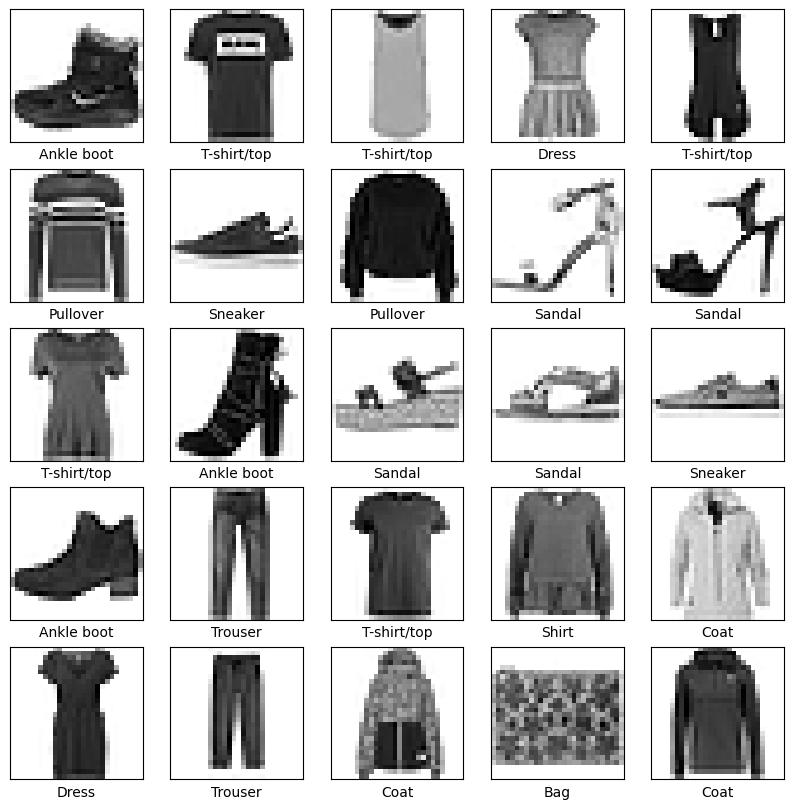

In [8]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# 1. Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Category Tags.
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Visualisation of partical data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])
plt.show()


In [9]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flattening images for MLP
train_images_mlp = train_images.reshape(train_images.shape[0], 28*28).astype('float32') / 255
test_images_mlp = test_images.reshape(test_images.shape[0], 28*28).astype('float32') / 255

# One-hot coded labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Constructing the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, input_dim=28*28, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(num_classes, activation='softmax'))

# Compilation model
mlp_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
mlp_model.summary()
# Training Model
mlp_history = mlp_model.fit(train_images_mlp, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluation Models
mlp_loss, mlp_accuracy = mlp_model.evaluate(test_images_mlp, test_labels)
print(f'MLP Test Accuracy: {mlp_accuracy}')


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6852 - loss: 0.8867 - val_accuracy: 0.8399 - val_loss: 0.4355
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8303 - loss: 0.4681 - val_accuracy: 0.8461 - val_loss: 0.4141
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8503 - loss: 0.4174 - val_accuracy: 0.8658 - val_loss: 0.3700
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8589 - loss: 0.3917 - val_accuracy: 0.8670 - val_loss: 0.3674
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8661 - loss: 0.3721 - val_accuracy: 0.8747 - val_loss: 0.3465
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8699 - loss: 0.3602
MLP Test Accuracy: 0.8654999732971191


In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
# Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data pre-processing
train_images_cnn = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images_cnn = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255
# One-hot coded label
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


# Creating a CNN model
cnn_model = Sequential()

# Convolutional Layer + Maximum Pooling Layer
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compilation model
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
mlp_model.summary()

# Training Model
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluation Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)
print(f'CNN Test Accuracy: {cnn_accuracy}')


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.6663 - loss: 0.9161 - val_accuracy: 0.8549 - val_loss: 0.4068
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 115ms/step - accuracy: 0.8455 - loss: 0.4252 - val_accuracy: 0.8718 - val_loss: 0.3463
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 110ms/step - accuracy: 0.8746 - loss: 0.3469 - val_accuracy: 0.8760 - val_loss: 0.3295
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.8866 - loss: 0.3101 - val_accuracy: 0.8950 - val_loss: 0.2872
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.8968 - loss: 0.2796 - val_accuracy: 0.8988 - val_loss: 0.2737
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8927 - loss: 0.2940
CNN Test Accuracy: 0.894599974155426


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


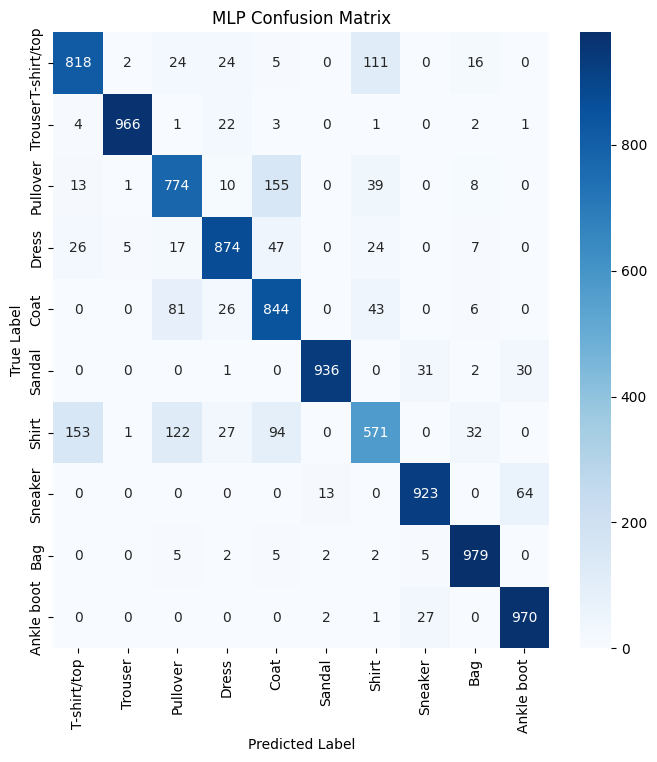

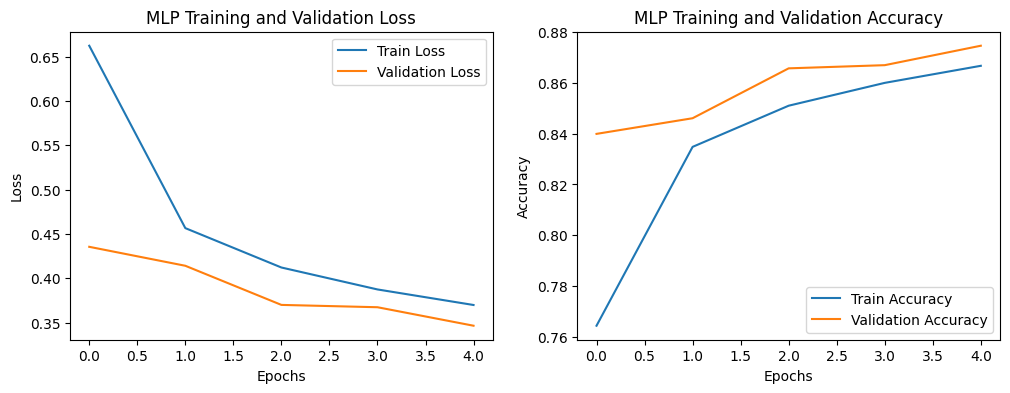

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Evaluation of the MLP model

mlp_predictions = np.argmax(mlp_model.predict(test_images_mlp), axis=1)
test_labels_true = np.argmax(test_labels, axis=1)

# Plotting the confusion matrix for MLP model
mlp_cm = confusion_matrix(test_labels_true, mlp_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("MLP Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting training loss and accuracy curves for MLP model
plt.figure(figsize=(12, 4))

# Plotting the loss curve
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


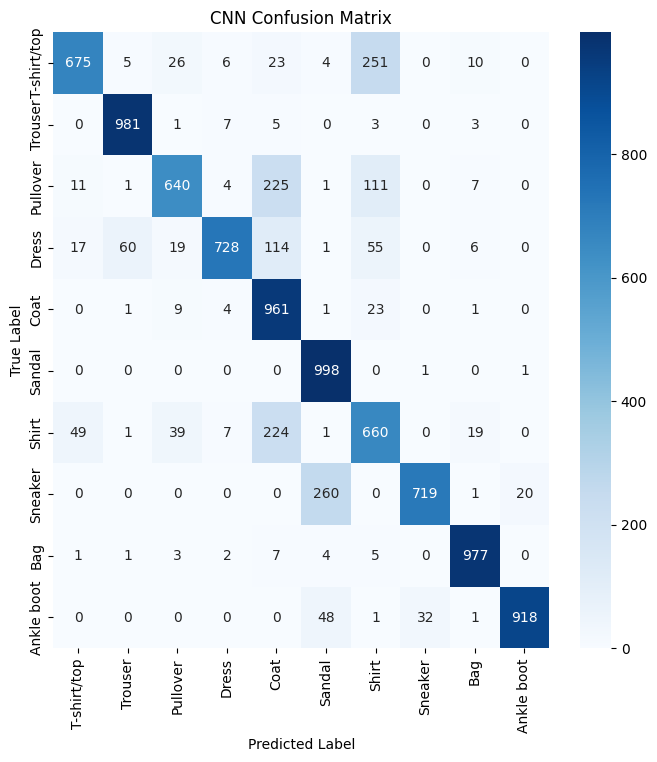

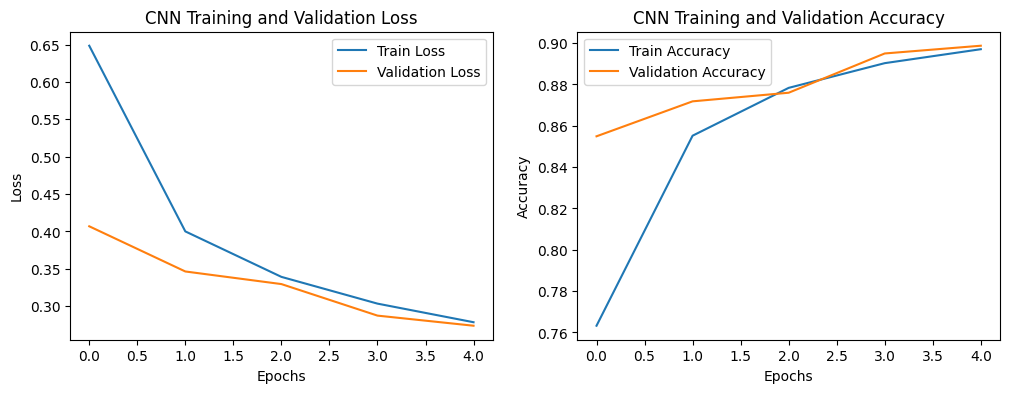

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnn_predictions = np.argmax(cnn_model.predict(test_images_cnn), axis=1)
test_labels_true_cnn = np.argmax(test_labels, axis=1)

# Evaluating CNN model
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=1)

# Plotting the confusion matrix for CNN model
cnn_cm = confusion_matrix(test_labels_true_cnn, cnn_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting training loss and accuracy curves for CNN model
plt.figure(figsize=(12, 4))

# Plotting loss curves
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curve
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()